In [166]:
import pandas as pd
import nltk
import spacy
import numpy
import math
import re
from dateutil import parser
import seaborn as sns
from sklearn.model_selection import train_test_split
from datetime import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import dateparser

In [152]:
df = pd.read_csv("allocine_squidgame.csv");

In [153]:
df.describe()

,key
count,341.000000
mean,6.920821
std,4.289132
min,0.000000
25%,3.000000
50%,7.000000
75%,11.000000
max,14.000000


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Note           341 non-null    object
 1   Description    341 non-null    object
 2   Date           341 non-null    object
 3   nombre_good    341 non-null    object
 4   nombre_follow  341 non-null    object
 5   key            341 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 16.1+ KB


In [155]:
df = df.drop(['key', 'nombre_follow'], axis=1)

In [156]:
df['nombre_good'] = df['nombre_good'].apply(lambda x: x.replace('\n\n\n', ' - '))
df['nombre_good'] = df['nombre_good'].apply(lambda x: x.replace('\n', ''))
df['Description'] = df['Description'].str.replace("\n", "");df

,Note,Description,Date,nombre_good
0,"3,0","On s'attendait à une fin plus élaborée, clairement. Des débuts engagés de Squid Game (dénonçant l'extrême pauvreté qui touche une grande partie de la population, le désintérêt des riches face à ces prolétaires à la rue, l’appât du gain qui fait faire n'importe quoi...), sa mise en scène clinquante qui nous aguiche l’œil (les jeux comme des cours de récré mortelles, on a adoré le concept), le personnage principal (""le bon gars, le vrai"") dont a vite pitié, quelques seconds rôles attachants (Ali... On ne s'en remet pas), retrouver ""le mec de Busan"" (oui, on a tous eu le même réflexe) pour un petit rôle, un sixième épisode en apogée dramatique de la série... Squid Game a beaucoup d'idées. Mais voilà, après cette vague immense d'atouts, la série semble ne plus savoir trop quoi en faire, et retombe dès l'épisode 7 dans le train-train habituel des films de jeux sadiques où l'on pousse un groupe de personnes à s'entretuer, nous mettant sous le nez des personnages ultra-caricaturaux (le couple du truand et de la folle - élue personnage insupportable de la série -) ou si vicieux que l'on finit par se moquer éperdument de leur sort (l'ami d'enfance du héros), et surtout, une fin à la spoiler: Saw. On n'en revient pas d'avoir exactement le même twist, à savoir que spoiler: le créateur du jeu qui se cache parmi les ""morts"" et se rince l’œil sur le déroulé des épreuves... On avait déjà à demi compris ce twist, lorsque la série dévoilait trop tôt que spoiler: le vieux ne gâte pas tant qu'il veut bien le laisser paraître (à la fin de l'épisode six) et qu'il est l'un des uniques personnages dont la mort n'est pas montrée en gros plan en face caméra (cette mise en scène des scènes de tuerie nous agace, on se l'avoue), ce qui interpelle forcément. Une demi-surprise, donc, pour une déception totale, en revanche. On a aussi failli s'étrangler devant le spectacle navrant des spoiler: VIP masqués en animaux ""boule à facettes"" qui viennent faire des paris sur les gagnants en gloussant de plaisir à chaque mort, ce qui ressemble à la ligne directrice des séries ""dark"" Netflix, qui critiquent de façon balourde, n'impressionnent que les jeunes ados (et encore), et font rire les amateurs de scénario plus fins. La fin laisse aussi la porte ouverte à plusieurs saisons, Netflix oblige, ce que l'on ne trouve pas nécessaire dans l'immédiat (à voir s'il l'on parvient à nous prouver le contraire avec une super saison 2, mais on en doute...). Si suite il y a, on préfèrera voir des alliances entre joueurs comme dans les débuts de Squid Game pour déjouer les pièges, plutôt que des gens qui se tirent dans les pattes de façon mesquine et ultra-prévisible, comme dans les films d'épouvante qu'on commence à connaître. On retient surtout le héros (""vraiment, c'est un bon gars""), le pauvre Ali, quelques jeux déchirants (les billes) ou surprenants (les trois premiers), une mise en scène originale, ""le mec de Busan"" et une critique acerbe de la société. Mais les épisodes 7 à 9 commencent une chute vertigineuse (sans besoin de verre faussement trempé) vers une fin des plus faciles, vue et revue si vous connaissez une certaine saga de films d'épouvante, et assez prévisible. You Win, pour cette saison, mais Game over pour la suite.",Publiée le 2 octobre 2021,22 - 10
1,"2,5","Encore une série très sur-côtée ! Tout est prévisible au possible, l'idée n'est pas si originale que ça et la fin est vraiment mauvaise... Cependant le jeu d'acteur et la qualité visuelle sont excellents ! On se laisse prendre au fur et à mesure des épisodes mais au final on savait très bien ce qui allait se passer quand, comment et pourquoi et c'est bien dommage. On est bien loin des gros drames coréens ! Ici c'est soft, un peu débile et souvent insupportable mais tout cela reste regardable.",Publiée le 1 octobre 2021,24 - 12
2,"4,5","Pas fan des séries coréennes en général. Je dois avouer que celle la m'a scotché de bout en bout. Incroyablement c

In [157]:
# On clean la date avec un regex pour sortir le "Publiée le" et garde seulement la date dans une nouvelle colonne 'Date_clean'
import dateparser
df['Date_clean'] = df['Date'].str.extract('Publiée le (\d.* .* \d.*)')


# On utilise le parser pour renvoyer un datetime dans une nouvelle colonne 'datetime'
df['datetime'] = df.apply(lambda row :dateparser.parse(row['Date_clean']) , axis = 1)





/home/greg/.local/lib/python3.8/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)


In [158]:
# On drop les colonnes dates inutiles
df.drop('Date',inplace=True,axis=1)
df.drop('Date_clean',inplace=True,axis=1);

In [159]:
df

,Note,Description,nombre_good,datetime
0,"3,0","On s'attendait à une fin plus élaborée, clairement. Des débuts engagés de Squid Game (dénonçant l'extrême pauvreté qui touche une grande partie de la population, le désintérêt des riches face à ces prolétaires à la rue, l’appât du gain qui fait faire n'importe quoi...), sa mise en scène clinquante qui nous aguiche l’œil (les jeux comme des cours de récré mortelles, on a adoré le concept), le personnage principal (""le bon gars, le vrai"") dont a vite pitié, quelques seconds rôles attachants (Ali... On ne s'en remet pas), retrouver ""le mec de Busan"" (oui, on a tous eu le même réflexe) pour un petit rôle, un sixième épisode en apogée dramatique de la série... Squid Game a beaucoup d'idées. Mais voilà, après cette vague immense d'atouts, la série semble ne plus savoir trop quoi en faire, et retombe dès l'épisode 7 dans le train-train habituel des films de jeux sadiques où l'on pousse un groupe de personnes à s'entretuer, nous mettant sous le nez des personnages ultra-caricaturaux (le couple du truand et de la folle - élue personnage insupportable de la série -) ou si vicieux que l'on finit par se moquer éperdument de leur sort (l'ami d'enfance du héros), et surtout, une fin à la spoiler: Saw. On n'en revient pas d'avoir exactement le même twist, à savoir que spoiler: le créateur du jeu qui se cache parmi les ""morts"" et se rince l’œil sur le déroulé des épreuves... On avait déjà à demi compris ce twist, lorsque la série dévoilait trop tôt que spoiler: le vieux ne gâte pas tant qu'il veut bien le laisser paraître (à la fin de l'épisode six) et qu'il est l'un des uniques personnages dont la mort n'est pas montrée en gros plan en face caméra (cette mise en scène des scènes de tuerie nous agace, on se l'avoue), ce qui interpelle forcément. Une demi-surprise, donc, pour une déception totale, en revanche. On a aussi failli s'étrangler devant le spectacle navrant des spoiler: VIP masqués en animaux ""boule à facettes"" qui viennent faire des paris sur les gagnants en gloussant de plaisir à chaque mort, ce qui ressemble à la ligne directrice des séries ""dark"" Netflix, qui critiquent de façon balourde, n'impressionnent que les jeunes ados (et encore), et font rire les amateurs de scénario plus fins. La fin laisse aussi la porte ouverte à plusieurs saisons, Netflix oblige, ce que l'on ne trouve pas nécessaire dans l'immédiat (à voir s'il l'on parvient à nous prouver le contraire avec une super saison 2, mais on en doute...). Si suite il y a, on préfèrera voir des alliances entre joueurs comme dans les débuts de Squid Game pour déjouer les pièges, plutôt que des gens qui se tirent dans les pattes de façon mesquine et ultra-prévisible, comme dans les films d'épouvante qu'on commence à connaître. On retient surtout le héros (""vraiment, c'est un bon gars""), le pauvre Ali, quelques jeux déchirants (les billes) ou surprenants (les trois premiers), une mise en scène originale, ""le mec de Busan"" et une critique acerbe de la société. Mais les épisodes 7 à 9 commencent une chute vertigineuse (sans besoin de verre faussement trempé) vers une fin des plus faciles, vue et revue si vous connaissez une certaine saga de films d'épouvante, et assez prévisible. You Win, pour cette saison, mais Game over pour la suite.",22 - 10,2021-10-02
1,"2,5","Encore une série très sur-côtée ! Tout est prévisible au possible, l'idée n'est pas si originale que ça et la fin est vraiment mauvaise... Cependant le jeu d'acteur et la qualité visuelle sont excellents ! On se laisse prendre au fur et à mesure des épisodes mais au final on savait très bien ce qui allait se passer quand, comment et pourquoi et c'est bien dommage. On est bien loin des gros drames coréens ! Ici c'est soft, un peu débile et souvent insupportable mais tout cela reste regardable.",24 - 12,2021-10-01
2,"4,5","Pas fan des séries coréennes en général. Je dois avouer que celle la m'a scotché de bout en bout. Incroyablement cruelle, caricaturant la so

In [160]:
df[['good', 'bad']] = df['nombre_good'].str.split(' ', n=1, expand=True)

In [161]:
df['Description'] = df['Description'].apply(lambda x: word_tokenize(x))

In [164]:
df['Note'] = df['Note'].apply(lambda x: x.replace(',', '.'))
df['Note'] = df['Note'].astype('float64')
df

,Note,Description,nombre_good,datetime,good,bad
0,3.0,"[On, s'attendait, à, une, fin, plus, élaborée, ,, clairement, ., Des, débuts, engagés, de, Squid, Game, (, dénonçant, l'extrême, pauvreté, qui, touche, une, grande, partie, de, la, population, ,, le, désintérêt, des, riches, face, à, ces, prolétaires, à, la, rue, ,, l, ’, appât, du, gain, qui, fait, faire, n'importe, quoi, ..., ), ,, sa, mise, en, scène, clinquante, qui, nous, aguiche, l, ’, œil, (, les, jeux, comme, des, cours, de, récré, mortelles, ,, on, a, adoré, le, concept, ), ,, le, personnage, principal, (, ``, le, bon, gars, ,, le, vrai, '', ), dont, a, vite, pitié, ,, ...]",22 - 10,2021-10-02,22,- 10
1,2.5,"[Encore, une, série, très, sur-côtée, !, Tout, est, prévisible, au, possible, ,, l'idée, n'est, pas, si, originale, que, ça, et, la, fin, est, vraiment, mauvaise, ..., Cependant, le, jeu, d'acteur, et, la, qualité, visuelle, sont, excellents, !, On, se, laisse, prendre, au, fur, et, à, mesure, des, épisodes, mais, au, final, on, savait, très, bien, ce, qui, allait, se, passer, quand, ,, comment, et, pourquoi, et, c'est, bien, dommage, ., On, est, bien, loin, des, gros, drames, coréens, !, Ici, c'est, soft, ,, un, peu, débile, et, souvent, insupportable, mais, tout, cela, reste, regardable, .]",24 - 12,2021-10-01,24,- 12
2,4.5,"[Pas, fan, des, séries, coréennes, en, général, ., Je, dois, avouer, que, celle, la, m, ', a, scotché, de, bout, en, bout, ., Incroyablement, cruelle, ,, caricaturant, la, société, d'une, façon, intelligente, ., Je, conseils, !]",20 - 21,2021-09-22,20,- 21
3,4.5,"[Disons, le, tout, de, suite, ,, je, suis, fan, depuis, 30, ans, des, productions, asiatiques, d'extrême, orient, ,, que, cela, soit, des, films, ou, des, séries, ., Avant, même, s'avoir, entendu, parlé, du, buzz, créé, par, cette, série, ,, son, origine, et, son, pitch, m, ', a, terriblement, plu, en, pensant, évidemment, avant, tout, à, Battle, Royale, ou, la, série, Liar, Game, ., Bref, ,, je, me, lance, dedans, sans, hésitation, et, ...., Je, n'ai, pas, pu, décrocher, jusqu'au, dernier, épisode, ., Tout, est, dit, ,, c'est, intense, ,, créatif, ,, accrocheur, et, terriblement, addictif, ., Je, ne, souhaite, pas, ...]",9 - 10,2021-10-05,9,- 10
4,4.0,"[Visuellement, recherché, ,, très, ludique, ,, rythmé, et, avec, une, galerie, de, personnages, intéressants, (, parce, que, jamais, parfaits, ), ., Avec, Squid, Game, ,, les, coréens, mettent, encore, la, barre, haute, avec, cette, série, !]",7 - 9,2021-09-25,7,- 9
...,...,...,...,...,...,...
336,5.0,"[Vraiment, une, des, meilleures, séries, que, j'ai, vu, récemment, ., Original, comparativement, à, toutes, ces, séries, américaines, qui, nous, sont, présentées, sans, cesse, .]",0 - 1,2021-10-24,0,- 1
337,4.5,"[Une, série, qui, fait, réfléchir.La, série, met, en, scène, une, multitude, de, métaphores, extrêmement, violentes, pour, dénoncer, les, inégalités, sociales, ., Elle, est, très, psychologique, contrairement, à, ce, que, certains, peuvent, penser, ou, dire, au, premier, abord, ., Je, la, conseille, à, toutes, personnes, recherchant, une, série, émotionnelle, et, psychologique, .]",0 - 0,2021-10-26,0,- 0
338,4.0,"[très, bonne, série, nous, tiens, en, haleine, du, début, à, la, fin, de, chaque, épisode, ., Série, rythmé, et, vivante, on, ne, dort, pas, .]",0 - 0,2021-10-26,0,- 0
339,3.5,"[Bonne, série, ,, je, trouve, que, c'est, une, version, soft, de, battle, Royale, avec, des, rebondissements, surtout, a, la, fin, mais, rien, qui, explique, un, quelconque, succès, planétaire, .]",0 - 0,2021-10-21,0,- 0


/home/greg/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='datetime', ylabel='Note'>

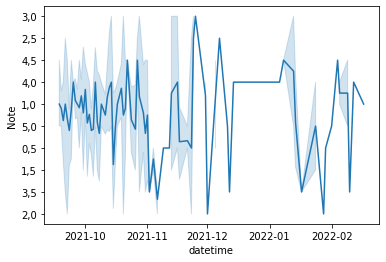

In [163]:
sns.lineplot(df['datetime'],df['Note'], sort=True)

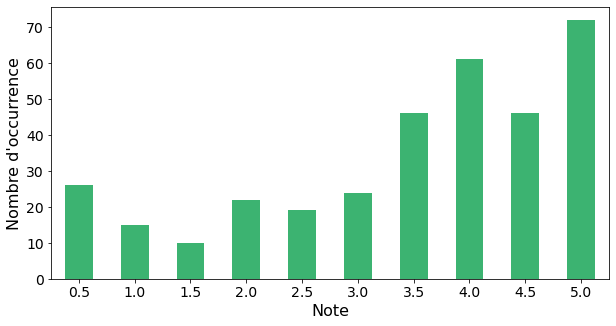

In [167]:
plt.figure(figsize=(10,5))

df['Note'].value_counts().sort_index().plot(kind='bar', color='mediumseagreen')

plt.xticks(rotation=0, fontsize=14)

plt.yticks(fontsize=14)

plt.xlabel('Note', fontsize=16)

plt.ylabel('Nombre d\'occurrence', fontsize=16)

plt.show()